# Who performs better?

Hooray, you have seen all the classifiers. But who is better? There is no clear answer on that. Every classifier is good in different tasks. But you cannot know by heart. The most efficient way to find out who performs beteer is to test them. 

And here is the challenge. You have [this](https://www.kaggle.com/uciml/mushroom-classification) dataset and you need to clean, organize, etc the data, apply all the classifiers we have presented you (or if you fine any other interesting classifier, feel free to test him too), and see the results. Do a comparizon and finally decide who is "better fit" for this dataset. 

If you find this exciting, or you finish early, feel free to do the same in a dataset of your preference. 

Deadline: TBD

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVM
from sklearn.svm import SVC
# Log
from sklearn.linear_model import LogisticRegression
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# Naive
from sklearn.naive_bayes import GaussianNB

/home/becode/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("mushrooms.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

[]

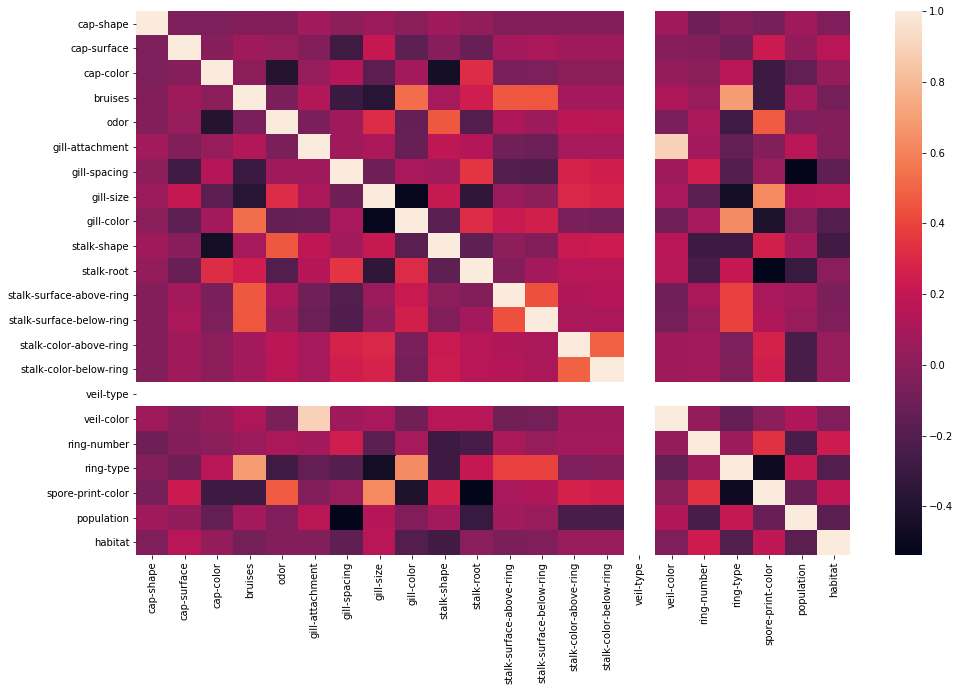

In [3]:
encoder = LabelEncoder()
train = data.drop(columns="class")
for col in train:
    train[col] = encoder.fit_transform(train[col])
test = encoder.fit_transform(data["class"])
corr = train.corr()
fig = plt.figure(figsize=(16,10))
sn.heatmap(corr)
plt.plot()

### Support Vector Classifier 

Had 100% evaluation with rbf kernel and auto gamma

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=.3)
classifier = SVC(kernel="linear", gamma="scale").fit(X_train, y_train)
y_score = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))

0.9721082854799016
0.9809610154125114
0.95837023914969


### Naive Bayes (Gaussian)

Not so good at the task

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=.3)
classifier = GaussianNB().fit(X_train, y_train)
y_score = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))

0.9183757178014766
0.9224936815501263
0.910981697171381


### Decision Tree

0.9896061269146609
1.0
0.9784274765824581


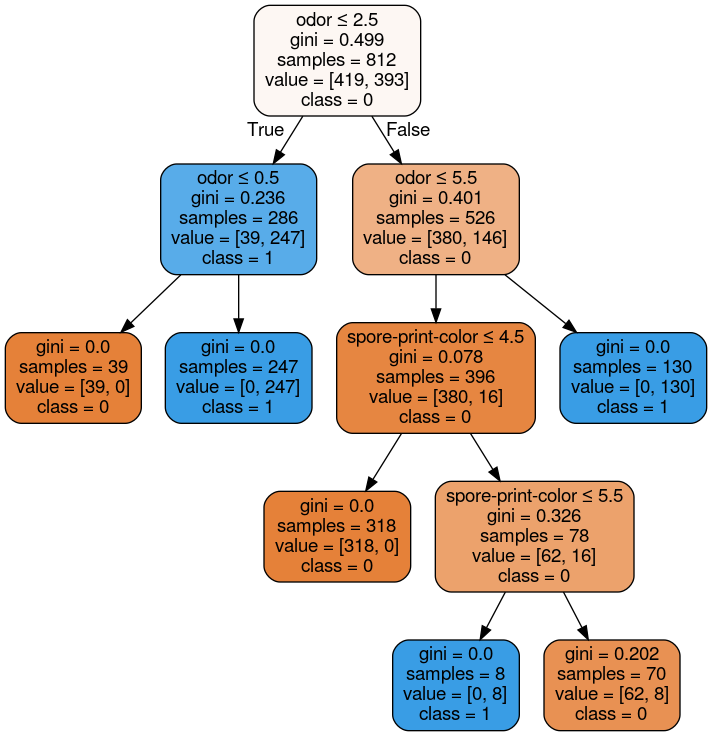

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=.9)
classifier = DecisionTreeClassifier(criterion="gini", splitter="best",max_depth=4).fit(X_train, y_train)
y_score = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [7]:
import numpy as np
train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Data

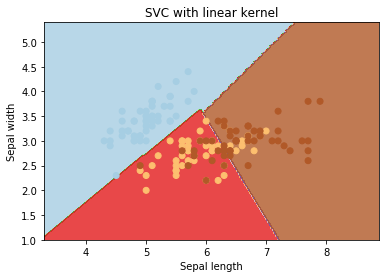

In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2] #all row first 2 col
y = iris.target
svc = SVC(kernel="linear", C=1, gamma=1).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) /100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

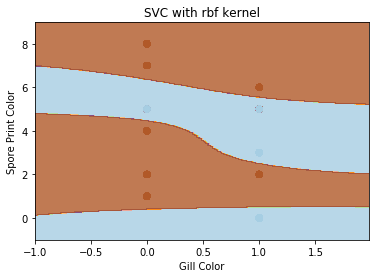

In [10]:
X = np.array(list(zip(train["bruises"], train["odor"])))
y = test
svc = SVC(kernel="rbf", C=1, gamma=.3).fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = abs((x_max / x_min) /100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(111)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=.8)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Gill Color')
plt.ylabel('Spore Print Color')

plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')

plt.show()